
# Section 5: analysing celebrity faces
## Video 1: Explore possible solutions: downloading the data, visualising it, and trying our previous networks

![overview image](http://mmlab.ie.cuhk.edu.hk/projects/celeba/overview.png)
Download the data here: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

Click on the [Google Drive link](https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?usp=drive_open)


![download](illustrations/downloadceleba.png)



You can find more information about the data in [this research paper](https://arxiv.org/abs/1411.7766). It's a great paper, and you should try to look over it and try to understand what they do. Reading literature about deep learning is a great way to discover what you know and don't know!

After extracting the file, place the CelebA folder in the datasets folder. Note that on my Macbook extracting the first time did not work, I had to use [The Unarchiver, which is free in the app store](https://theunarchiver.com/). 

In [1]:
import os
filenames = list()
labels = list()

## Set the paths for images and annotations
folder_base = 'datasets/CelebA/'
folder_images = os.path.join(folder_base,
                               "Img/img_align_celeba/img_align_celeba/")
filename_annotations = os.path.join(folder_base,
                                      "Anno/list_attr_celeba.txt")

with open(filename_annotations) as in_file:
    count_datapoints = int(in_file.readline())
    plaintext_labels = in_file.readline().split()
    
    for line in in_file:
        splitted = line.split()
        filenames.append(os.path.join(folder_images,splitted[0]))
        properties_celebrity = [float(x) for x in splitted[1:]]
        properties_celebrity = [max(0.0, x) for x in properties_celebrity]
        labels.append(properties_celebrity)
assert len(filenames) == len(labels)

print(labels[:4])
print(filenames[:4])



[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]]
['datasets/CelebA/Img/img_align_celeba/img_align_celeba/000001.jpg', 'datasets/CelebA/Img/img_align_celeba/img_align_celeba/000002.jpg', 'datasets/CelebA/Img/img_align_celeba/img_align_celeba

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


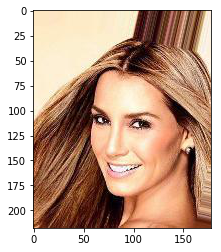

[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]


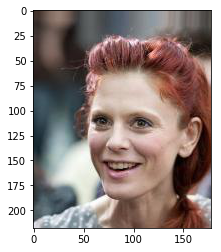

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


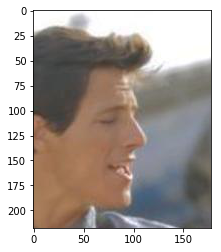

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


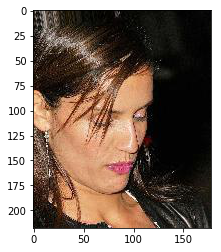

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

SHOW_FIRST_N = 4
print(plaintext_labels)
for filename,properties in zip(filenames[:SHOW_FIRST_N],labels[:SHOW_FIRST_N]):
    image = plt.imread(filename)
    plt.imshow(image)
    plt.show()
    print(properties)

## Revised: video 2: Building an input pipeline in Tensorflow
So far we loaded all data into our memory, and fed parts of it to our Tensorflow graph. In this section we are dealing with 1.78 gig of data, spread over 202.600 images. This is A LOT of data! Although we could probably load everything anyways, or load it outside of our graph when we need it, we can also build a whole input pipeline with Tensorflow. Take a look at this programmers guide for datasets: https://www.tensorflow.org/programmers_guide/datasets

In this video we are going to build an input pipeline with Tensorflow that reads images, does some operations on them, and gives them to us in batches. 


## Partitioning data into a train and test set
To show that you can even ask Tensorflow to split your data into a train and testset we will create a "partition vector". This partition vector will contain ones and zeros, and we will later use it to split our train and set set. 

In [3]:
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
import random

# convert string into tensors
all_images = ops.convert_to_tensor(filenames, dtype=dtypes.string)
all_labels = ops.convert_to_tensor(labels, dtype=dtypes.float32)

# create a partition vector
partitions = [0] * len(labels)
test_set_size = int(0.8 * len(labels))
partitions[:test_set_size] = [1] * test_set_size
random.shuffle(partitions)
print(partitions[0:20])

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Dynamic partitioning and queues

We now have a partition vector: `[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]`. We will use the `tf.dynamic_partition` function to split this data into a train and test set: https://www.tensorflow.org/api_docs/python/tf/dynamic_partition. 

![dynamic partition](https://www.tensorflow.org/images/DynamicPartition.png)

The slice input producer "Produces a slice of each Tensor in tensor_list". We feed the train images and labels to this queue and will use it later to get our images from. 

In [4]:
import tensorflow as tf
import numpy as np

# partition our data into a test and train set according to our partition vector
train_images, test_images = tf.dynamic_partition(all_images, partitions, 2)
train_labels, test_labels = tf.dynamic_partition(all_labels, partitions, 2)

train_input_queue = tf.train.slice_input_producer(
                                    [train_images, train_labels],
                                    shuffle=False)
test_input_queue = tf.train.slice_input_producer(
                                    [test_images, test_labels],
                                    shuffle=False)
print(train_input_queue)

[<tf.Tensor 'input_producer/Gather:0' shape=() dtype=string>, <tf.Tensor 'input_producer/Gather_1:0' shape=(40,) dtype=float32>]


### Loading images from the train queue
![start input pipeline](illustrations/section5/start_input_pipeline.png)
The input_producer gives us filenames that we want to read. Every time we run `sess.run(train_input_queue)` we get a new filename. We can load this image using the `tf.read_file` function, and decode the jpeg with the `tf.image.decode_jpeg` function. 

In [5]:
NUM_CHANNELS = 3
file_content = tf.read_file(train_input_queue[0])
image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)

### Starting queuerunners
Now that we are dynamically loading images we have to do a bit more every time we want to run our graph in a session. We have to create a `Coordinator` and start the queue runners. More information can be found here in the documentation: https://www.tensorflow.org/versions/r0.12/api_docs/python/train/coordinator_and_queuerunner

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

(218, 178, 3)


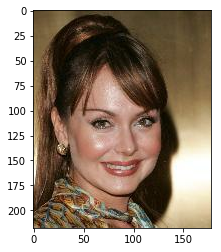

(218, 178, 3)


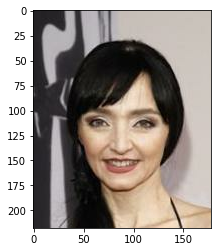

(218, 178, 3)


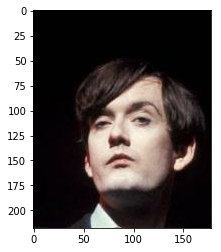

(218, 178, 3)


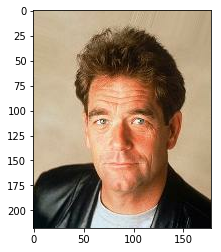

(218, 178, 3)


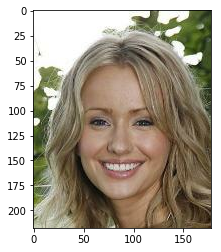

In [7]:
for _ in range(5):
    img_from_queue = sess.run(image)
    print(img_from_queue.shape)
    plt.imshow(img_from_queue)
    plt.show()

### Changing our input stream
Great! It looks like we are able to load images from our input stream. Next video we are going to classify these images, but before we do that I would like to "preprocess" the images. Right now they are 218 by 178, and there is a lot of background around the images. Luckily we can add Tensorflow functions to our graph that resize and crop our images. If we create a function that does this we can apply this function to our train and test image pipeline.


In [8]:
IMAGE_HEIGHT = 48 # original size: 218
IMAGE_WIDTH = 48 # original size: 178
BATCH_SIZE = 32
def load_image_in_graph(queue):
    file_content = tf.read_file(queue[0])
    image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)
    cropped_image = tf.image.central_crop(image, 0.5)
    resized_image = tf.image.resize_images(cropped_image,(IMAGE_HEIGHT,IMAGE_WIDTH))
    return resized_image

train_image = load_image_in_graph(train_input_queue)
train_label = train_input_queue[1]

test_image = load_image_in_graph(test_input_queue)
test_label = test_input_queue[1]

### Batching
As you know by now we prefer to feed multiple images at the same time in a batch to our neural network. The output of our pipeline is only one image at the same time, but we can fix this by using the `tf.train.batch` function in Tensorflow!

In [9]:
train_image.set_shape([IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS])
test_image.set_shape([IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS])

# collect batches of images before processing
train_image_batch, train_label_batch = tf.train.batch([train_image, 
                                                 train_label], 
                                                 batch_size=BATCH_SIZE)
test_image_batch, test_label_batch = tf.train.batch([test_image, 
                                               test_label], 
                                               batch_size=BATCH_SIZE)

This makes our last part of the pipeline look like this: 
![end input pipeline](illustrations/section5/end_input_pipeline.png)


### Using our input stream
In this video we built a whole input stream, let's test if we get a batch, and let's see if our input images still make sense.


(32, 48, 48, 3)
[[[  49.           48.           46.        ]
  [  39.           38.           36.        ]
  [  24.25         23.25         19.75      ]
  ..., 
  [  41.           38.875        37.25      ]
  [  24.25         20.25         17.25      ]
  [  20.125        16.125        13.125     ]]

 [[  42.125        41.125        39.125     ]
  [  29.19791603   28.19791603   26.19791603]
  [  12.65625      11.65625       8.15625   ]
  ..., 
  [  30.53645897   29.71875      28.08333397]
  [  35.33333206   34.33333206   32.33333206]
  [  29.18229294   25.18229294   22.18229294]]

 [[  34.66666412   33.66666412   31.66666603]
  [  17.88541603   16.88541603   14.88541603]
  [  17.10416603   16.10416603   12.60416698]
  ..., 
  [  40.36458206   40.36458206   40.36458206]
  [  28.5          27.5          25.5       ]
  [  34.0625       33.0625       31.0625    ]]

 ..., 
 [[  18.75         16.75         17.75      ]
  [  15.875        13.875        14.875     ]
  [  17.0625       15.71875

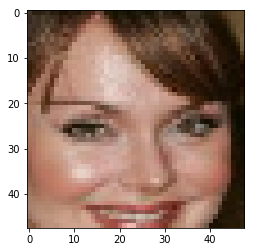

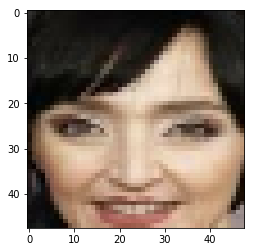

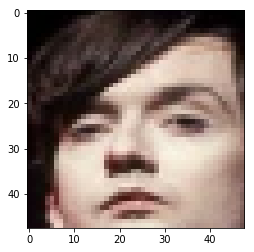

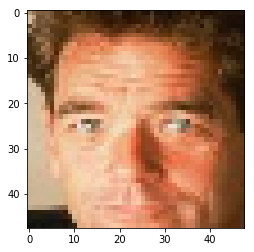

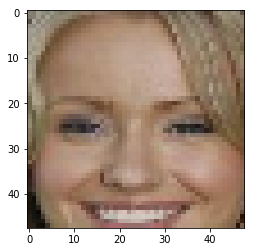

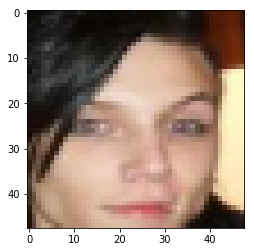

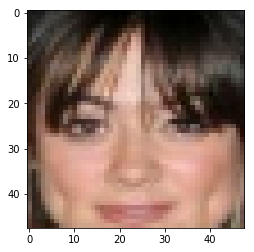

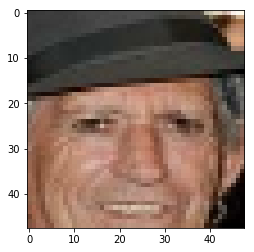

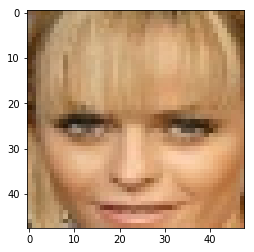

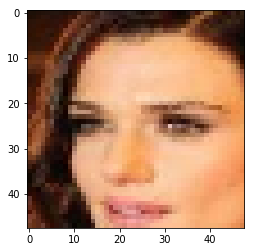

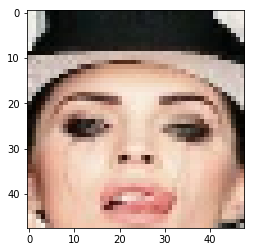

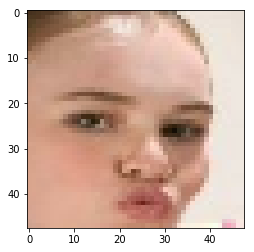

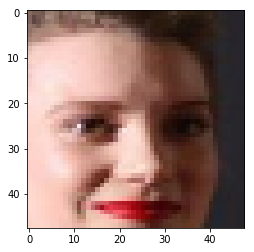

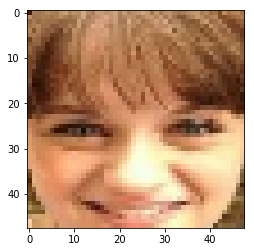

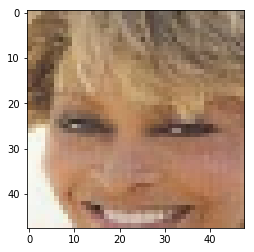

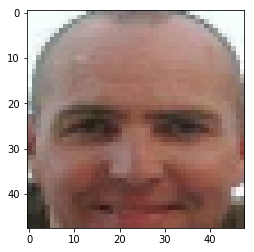

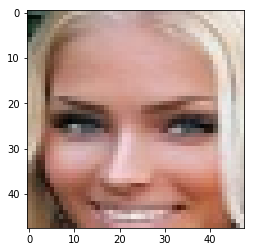

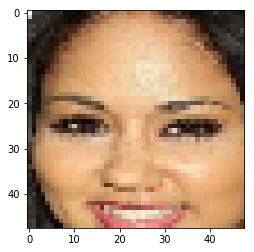

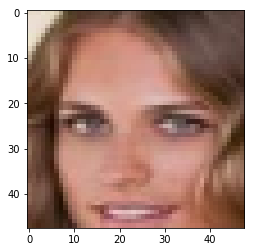

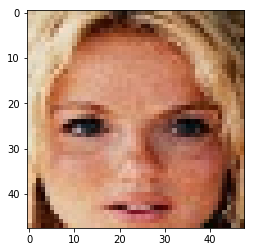

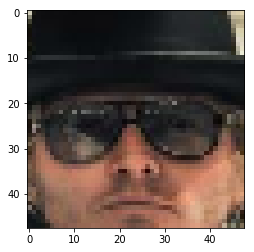

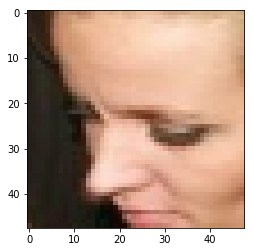

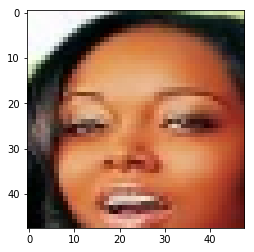

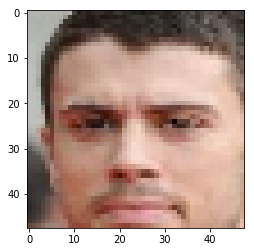

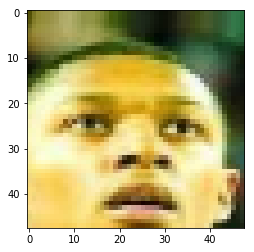

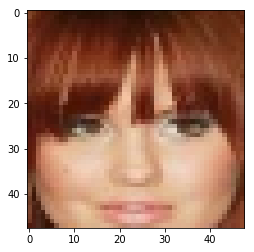

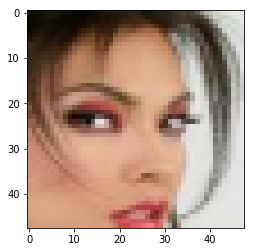

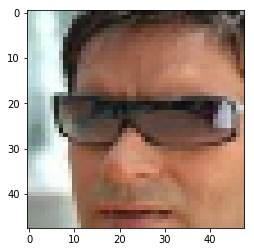

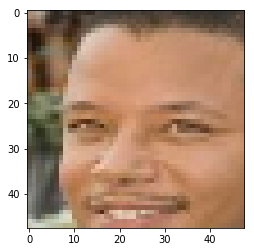

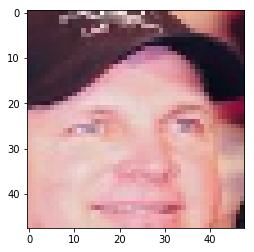

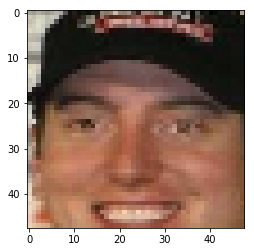

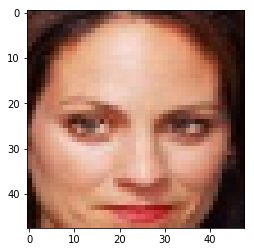

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

now_images, now_labels = sess.run([train_image_batch, train_label_batch])
print(now_images.shape)
print(now_images[1,:,:,:])

now_images = now_images.astype(np.uint8)
for im in now_images:
    plt.imshow(im)
    plt.show()

![end input pipeline](illustrations/section5/wholepipeline.png)

## Revised: video 3: Building a conv + max pool network
Note here about that the original image sizes are really big, and would require a lot of parameters, and that we want to run this on an old laptop. 

In [11]:
train_image_batch_float = tf.cast(train_image_batch, dtype=tf.float32)
train_image_batch_float_norm = tf.divide(tf.subtract(train_image_batch_float,128),128)

conv1_1 = tf.layers.conv2d(train_image_batch_float_norm, 32, [5,5],activation=tf.nn.relu)
conv1_2 = tf.layers.conv2d(conv1_1, 32, [5,5],activation=tf.nn.relu)
maxp1 = tf.layers.max_pooling2d(conv1_2, [2,2], strides=2)

conv2_1 = tf.layers.conv2d(maxp1, 64, [3,3], activation=tf.nn.relu)
maxp2 = tf.layers.max_pooling2d(conv2_1, [2,2], strides=2)

conv3 = tf.layers.conv2d(maxp2, 128, [3,3], activation=tf.nn.relu)
print(conv3)

res = tf.contrib.layers.flatten(conv3)
print(res)

dense1 = tf.layers.dense(res,1024, activation=tf.nn.relu)
dense2 = tf.layers.dense(dense1,256, activation=tf.nn.relu)
dense3 = tf.layers.dense(dense2,40, activation=tf.nn.relu)
print(dense3)
print(train_label_batch)
#loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=train_label_batch, logits=dense3)
#loss = tf.nn.weighted_cross_entropy_with_logits(train_label_batch, dense3, AWESOME_WEIGHTS)
MALE_WEIGHTS = [0.0]*40
MALE_WEIGHTS[20]=1.0
print(MALE_WEIGHTS)
print(AWESOME_WEIGHTS)
MALE_WEIGHTS = np.array(MALE_WEIGHTS)

male_labels = tf.gather(train_label_batch,[9,20],axis=1)
male_prediction = tf.gather(dense3,[9,20],axis=1)

loss = tf.losses.mean_squared_error(male_labels, male_prediction)
#loss = tf.nn.weighted_cross_entropy_with_logits(train_label_batch, dense3, AWESOME_WEIGHTS)
#loss = tf.nn.weighted_cross_entropy_with_logits(train_label_batch, dense3, MALE_WEIGHTS)
print(loss)
#optimizer = tf.train.AdamOptimizer().minimize(loss)
# loss = tf.losses.mean_squared_error(train_label_batch,dense3)
# # learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
# #                                            100000, 0.01, staircase=True)
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.03
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100, 0.95, staircase=True)
# # Passing global_step to minimize() will increment it at each step.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


Tensor("conv2d_4/Relu:0", shape=(32, 7, 7, 128), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(32, 6272), dtype=float32)
Tensor("dense_3/Relu:0", shape=(32, 40), dtype=float32)
Tensor("batch:1", shape=(32, 40), dtype=float32)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


NameError: name 'AWESOME_WEIGHTS' is not defined

In [ ]:
print(dense3)
a = tf.gather(dense3,[20],axis=1)
print(a)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
loss_history = list()
for iteration in range(2000):
    _, l, lr = sess.run([optimizer, loss, learning_rate])
    if iteration%100==0:
        print(l)
#        print(sum(sum(l)))
        print("LR: " + str(lr))
    loss_history.append(l)
#    loss_history.append(sum(sum(l)))

In [ ]:
plt.plot(loss_history)
def last_avg(listje):
    print(sum(listje[-100:])/100)
last_avg(loss_history)

In [ ]:
from sklearn.metrics import roc_curve
import sklearn

big_dataset_test_labels = list()
big_dataset_predicted = list()
print("aa")
for _ in range(20):
    test_images, test_labels = sess.run([test_image_batch, test_label_batch])
    predicted = sess.run(dense3, feed_dict={train_image_batch:test_images})
    big_dataset_test_labels.extend(test_labels)
    big_dataset_predicted.extend(predicted)
    print("blaa")

for indextouse in range(30):
    train_roc_labels = [x[indextouse] for x in big_dataset_test_labels]
    train_roc_predicted = [x[indextouse] for x in big_dataset_predicted]
    rocstuff = sklearn.metrics.roc_curve(train_roc_labels, train_roc_predicted)#$ pos_label=None, sample_weight=None, drop_intermediate=True
    print(rocstuff[0][:6])
    print(rocstuff[1][:6])
    print(rocstuff[2][:6])
    plt.scatter(rocstuff[0], rocstuff[1])
    plt.plot(rocstuff[0], rocstuff[1])
    plt.title(plaintext_labels[indextouse])
    plt.show()
#print(rocstuff[0])
#print(rocstuff[1])

### Original idea here!!


In [ ]:
#tf.layers.batch_normalization?

In [ ]:
print(train_image_batch)
print(train_label_batch)
# tf.layers?
# tf.layers.max_pooling2d?
train_image_batch_float = tf.cast(train_image_batch, dtype=tf.float32)
## NORMALISE HERE!

def get_model(image_input):
    train_image_batch_float_norm = tf.divide(tf.subtract(image_input,128),128)
    conv1 = tf.layers.conv2d(train_image_batch_float_norm, 32, [5,5])
    maxp1 = tf.layers.max_pooling2d(conv1, [2,2], strides=2)
    conv2 = tf.layers.conv2d(maxp1, 64, [3,3])
    maxp2 = tf.layers.max_pooling2d(conv2, [2,2], strides=2)
    conv3 = tf.layers.conv2d(maxp2, 128, [3,3])
    maxp3 = tf.layers.max_pooling2d(conv3, [2,2], strides=2)
    res = tf.contrib.layers.flatten(maxp3)
    print(res)
    dense1 = tf.layers.dense(res,1024, activation=tf.nn.relu)
    dense2 = tf.layers.dense(dense1,256, activation=tf.nn.relu)
    dense3 = tf.layers.dense(dense2,40, activation=tf.nn.sigmoid)
    return conv1, conv2, conv3, dense3

def get_model_batch_normalisation(image_input):
    train_image_batch_float_norm = tf.divide(tf.subtract(image_input,128),128)
    conv1 = tf.layers.conv2d(train_image_batch_float_norm, 32, [5,5])
    maxp1 = tf.layers.max_pooling2d(conv1, [2,2], strides=2)
    blaat1 = tf.layers.batch_normalization(maxp1)
    conv2 = tf.layers.conv2d(blaat1, 64, [3,3])
    maxp2 = tf.layers.max_pooling2d(conv2, [2,2], strides=2)
    blaat2 = tf.layers.batch_normalization(maxp2)
    conv3 = tf.layers.conv2d(maxp2, 128, [3,3])
    maxp3 = tf.layers.max_pooling2d(conv3, [2,2], strides=2)
    res = tf.contrib.layers.flatten(maxp3)
    blaat3 = tf.layers.batch_normalization(res)
    print(res)
    dense1 = tf.layers.dense(blaat3,1024, activation=tf.nn.relu)
    dense2 = tf.layers.dense(dense1,256, activation=tf.nn.relu)
    dense3 = tf.layers.dense(dense2,40, activation=tf.nn.sigmoid)
    return conv1, conv2, conv3, dense3


conv1, conv2, conv3, dense3 = get_model_batch_normalisation(train_image_batch_float)


#loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=train_label_batch, logits=dense3)
loss = tf.nn.weighted_cross_entropy_with_logits(train_label_batch, dense3, AWESOME_WEIGHTS)
print(loss)
optimizer = tf.train.AdamOptimizer().minimize(loss)
#optimizer = tf.train.MomentumOptimizer(0.05, 0.2).minimize(loss)

https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits

In [ ]:
%matplotlib inline
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
a  = sess.run(train_image)
import matplotlib.pyplot as plt
plt.imshow(a)
loss_history = list()
for _ in range(2000):
    _, l = sess.run([optimizer, loss])
    print(sum(sum(l)))
    loss_history.append(sum(sum(l)))

In [ ]:
plt.plot(loss_history)

In [ ]:
for _ in range(2000):
    _, l = sess.run([optimizer, loss])
    print(sum(sum(l)))
    loss_history.append(sum(sum(l)))

In [ ]:
from sklearn.metrics import roc_curve
a = sklearn.metrics.roc_curve([1], [0.24])#$ pos_label=None, sample_weight=None, drop_intermediate=True

print(a)
## RETURNS: 
# fpr : array, shape = [>2]
# Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
# tpr : array, shape = [>2]
# Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
# thresholds : array, shape = [n_thresholds]


In [ ]:
from sklearn.metrics import roc_curve
import sklearn

big_dataset_test_labels = list()
big_dataset_predicted = list()
for _ in range(20):
    test_images, test_labels = sess.run([test_image_batch, test_label_batch])
    predicted = sess.run(dense3, feed_dict={train_image_batch:test_images})
    big_dataset_test_labels.extend(test_labels)
    big_dataset_predicted.extend(predicted)

for indextouse in range(30):
    train_roc_labels = [x[indextouse] for x in big_dataset_test_labels]
    train_roc_predicted = [x[indextouse] for x in big_dataset_predicted]
    rocstuff = sklearn.metrics.roc_curve(train_roc_labels, train_roc_predicted)#$ pos_label=None, sample_weight=None, drop_intermediate=True
    print(rocstuff[0][:6])
    print(rocstuff[1][:6])
    print(rocstuff[2][:6])
    plt.scatter(rocstuff[0], rocstuff[1])
    plt.plot(rocstuff[0], rocstuff[1])
    plt.title(plaintext_labels[indextouse])
    plt.show()
#print(rocstuff[0])
#print(rocstuff[1])

In [ ]:
print(plaintext_labels)

In [ ]:
#test_images, test_labels = sess.run([test_image_batch, test_label_batch])
conv_results = sess.run(conv3, feed_dict={train_image_batch:test_images})
print(conv_results.shape)
conv_res = conv_results[0]
for layer in range(32):
    plt.imshow(conv_res[:,:,layer])
    plt.show()
#plt.imshow((test_images[0]*128)+128)
#print(test_images[0])

In [ ]:
# print(rocstuff[2])
# plt.plot(rocstuff[2])
# plt.show()


# Remark about how weights really improve learning for sparse data

In [ ]:
import numpy as np
a = np.array(labels)
print(a.shape)
print(np.mean(a,axis=0))
print(len(np.mean(a,axis=0)))
print(plaintext_labels)
AWESOME_WEIGHTS = 1/np.mean(a,axis=0)
AWESOME_WEIGHTS = np.clip(AWESOME_WEIGHTS, 1.0, 5.0)
AWESOME_WEIGHTS /= 2
print(AWESOME_WEIGHTS)

In [ ]:

a  = sess.run(train_image)
import matplotlib.pyplot as plt
plt.imshow(a)
print(a.shape)

# for _ in range(2000):
    _, l = sess.run([optimizer, loss])
    print(sum(sum(l)))

In [ ]:
train_image_batch_float = tf.cast

In [ ]:
# import tensorflow as tf
# files = tf.train.match_filenames_once("datasets/CelebA/Anno/*.txt")
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     print(sess.run(files))


In [ ]:
# # load dataset
# import tensorflow as tf
# tf.reset_default_graph()
# filename_queue = tf.train.string_input_producer(["datasets/CelebA/Anno/list_attr_celeba.txt"])
# print(filename_queue)
# reader = tf.TextLineReader(skip_header_lines=2)
# key, value = reader.read(filename_queue)
# print(key)
# print(value)
# indices, values, shape = tf.string_split([value], delimiter=' ')


# sess = tf.Session()
# init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
# sess.run(init)

# coord = tf.train.Coordinator()
# threads = tf.train.start_queue_runners(sess=sess, coord=coord)

# for _ in range(10):
#     a = sess.run([key, value])
#     print(a)
# #    print(sess.run(split_val))


In [ ]:
# print(split_val)

This leads to nothing: 
> Sparse input data

SparseTensors don't play well with queues. If you use SparseTensors you have to decode the string records using tf.parse_example after batching (instead of using tf.parse_single_example before batching).

From this page: https://www.tensorflow.org/api_guides/python/reading_data


Great tutorial: https://ischlag.github.io/2016/06/19/tensorflow-input-pipeline-example/

In [ ]:
sess = tf.Session()
  
# initialize the variables
sess.run(tf.global_variables_initializer())

# initialize the queue threads to start to shovel data
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)


In [ ]:
#sess.run(train_image_batch)
len(sess.run(train_label_batch)[0])



In [ ]:
print(train_image)
print(train_label)

In [ ]:
plaintext_labels

In [ ]:
import tensorflow as tf
tf.TextLineReader?

There are three other methods of getting data into a TensorFlow program:

Feeding: Python code provides the data when running each step.
Reading from files: an input pipeline reads the data from files at the beginning of a TensorFlow graph.
Preloaded data: a constant or variable in the TensorFlow graph holds all the data (for small data sets).


In [ ]:
#  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
import tensorflow as tf
tf.layers?
tf.layers.conv2d?

In [ ]:
tf.placeholder?

inputshape=[None,178,218]
input_layer = tf.placeholder(dtype=tf.float32, shape=inputshape, name='celebinput')

conv1 = tf.layers.conv2d(inputs=input_layer,filters=32,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
print(pool2)

## Section 3: Countering overfitting techniques: dropout and L2 regularization
With neural networks more data is always better. Large deep neural networks are almost always capable of learning input-output labels. This was recently demonstrated in this paper, in which they added random labels to images, the neural network was able to predict this nonsense label 100% of the time on the trainset. 

This "overfitting" is a big problem in neural networks. There are many ways to counter this, the two most famous ways are "L2 normalisation" and "dropout". 

### Dropout 
In neural networks every neuron tends to search for one specific pattern. This is all fine, except for that neurons tend to search for dataset specific patterns. To counter this we can randomly set the activations of neurons to zero during training. To score well on the trainset multiple neurons have to be able to detect the same patterns. This in turn ensures that your network generalises well and that you don't overfit. 

Units that are keps are scaled. This way the sum of the active neurons is unchanged. 

There is one parameter to dropout: what percentage of neurons to set to zero. A rate of 0.1 drops 10% of the input units. Hurray, another hyper-parameter you can control during learning!


### L2 regularization
When neural networks overfit some neurons have large weights to other neurons. If this pattern is not visible in the testset your network will still perform poorly. To counter this we can add an extra loss term: a penalty for having large weights! Although this is a great technique, it also required a lot of manual tuning. If you set the penalty too low your network does not care about the regularization. If you set the penalty too high your network won't be able to learn anything. 




In [ ]:
tf.layers.dropout?

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/nn/l2_loss

## Section 4: Tricks for faster training: batch normalisation
With picture humans are able to spot patterns that are difficult for neural networks to spot. An image can be grayscale, overlighted, very dark, or noisy: humans can still spot it. 

https://www.quora.com/Why-does-batch-normalization-help

It can help you learn faster, and also gives you a higher accuracy. 

There is a bit of a difference in the "backward pass" through the neural network. This writeup explains it in a very clear way. http://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html

https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization

Example in Tensorflow: http://ruishu.io/2016/12/27/batchnorm/


Remember when we applied dropout? We used a placeholder to set the percentage it had to drop. During inference (our testing and deployment) we don't want to have any dropout or batch normalization. 


## Section 5: Understand what your network learned: visualising layers and activations

A cool thing about neural networks is that you can see what your neuron reacts to. For normal neurons this can be difficult to see, especially in deeper layers. For convolutional layers however this can be a vital step to inspecting what your network actually learned. 

### Why is this important
Although we humans are good at knowing exactly what to look for when classifying an image, a neural network has to learn this from scratch. Some famous stories tell about the US building neural networks to classify tanks. As training data for the American tanks they took some pictures of the tanks outside of their base. For the Russian tanks they used spy cameras. Although the network performed great on the train and testset it did not work at all in the field... It turned out that the neural network learned the difference between a blurry image (taken with a spy camera) and a clear image (taken at the base itself). 

Another great example to consider is classifying if something is a wolf or a dog. Give it a try: 

![Search result dog](illustrations/dogsearch.png)
![Search result wolf](illustrations/wolfsearch.png)

What you might use to see the different are that wolfs have pointing up ears and thick fur. A neural network could go for totally different features: apparently dogs like to sit in green grass, and wolfs are often found in the snow. If you take the classefier you trained on this data to the local zoo it would likely not recognise the wolfs if there is no snow in the zoo. 


We are going to take a look at the activations of our layers, and will see if we can detect some nice features. 


In [ ]:
tf.nn.sigmoid_cross_entropy_with_logits

In [ ]:
tf.nn.sigmoid_cross_entropy_with_logits?